#Dropped because tf-idf is not giving good results on keyword extraction

#Converting Resumes pdfs into Excel file

In [ ]:
!pip install pymupdf pandas openpyxl


In [ ]:
!pip install pymupdf pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 75.4 MB/s eta 0:00:00


In [ ]:
import os
import fitz  # PyMuPDF for reading PDF files
import pandas as pd

# Paths to the folders
input_folder = "/content/drive/MyDrive/FYP/Resume Scanning Using BERT (File responses)/Upload Your Resume (File responses)"  # Folder containing PDF resumes
output_file = "all_resumes_combined.xlsx"  # Combined Excel file

# List to store data for each resume
data = []

# Step 1: Loop through each PDF in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(input_folder, filename)

        # Step 2: Extract text from PDF
        with fitz.open(pdf_path) as pdf:
            text = ""
            for page in pdf:
                text += page.get_text() + "\n"

        # Append filename and content to data list
        data.append([filename, text])

# Step 3: Sort the data alphabetically by filename
data.sort(key=lambda x: x[0])

# Step 4: Create a DataFrame and save to a single Excel file
df = pd.DataFrame(data, columns=["Filename", "Content"])
df.to_excel(output_file, index=False)

print("All resumes have been combined into a single Excel file in alphabetical order.")
display_df = pd.read_excel(output_file)
display_df


All resumes have been combined into a single Excel file in alphabetical order.


,Filename,Content
0,A-Roshan Account Manager Oct 2024-1 - Roshan K...,"Muhammad Roshan Khurshid \nWah Cantt, 47040 | ..."
1,AQ_Resume - K214602 Ammar Safdar Quadri.pdf,AMMAR\nEXPERIENCE\nEDUCATION\nUNIVERSITY PROJE...
2,Aizaz's resume(new) - k224012 Aizaz Usman.pdf,PINTUACCOMPLISHE\nD AND \nAMBITIACCOMPLISH\nED...
3,Aqib Shah (Python Developer) - Aqib Shah.pdf,"Intermediate | DJ Sindh Govt Science, College\..."
4,AshadAbdullah Resume - K213296 Ashad Abdullah ...,Ashad Abdullah\n+92 (321) 308 5273\n|\nashad00...
...,...,...
73,candidate_132.pdf,DAVID PHIAST\nA P P L I C A T I O N D E V E L...
74,candidate_135.pdf,KHOLE MOORE\nG R A D U A T E R E S E A R C H ...
75,candidate_139.pdf,KEISUKE YAMAMOTO\nPROFILE\nProfessional with 3...
76,candidate_141.pdf,P R O F I L E\nSoftware developer with a niche...


#Preprocessing Resumes

In [ ]:
!pip install nltk pandas openpyxl



In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Load the input Excel file
input_file = "/content/all_resumes_combined.xlsx"
output_file = "all_resumes_combined_preprocessed.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(input_file)

# Define a function to lemmatize text and add commas between words
def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words = [word.lower() for word in lemmatized_words if word.lower() not in stop_words]
    # Join the lemmatized words with commas
    return ', '.join(filtered_words)

# Apply lemmatization to the "Content" column
df['Preprocessed_Content'] = df['Content'].apply(preprocess_text)

# Sort the DataFrame alphabetically by the "Filename" column
df = df.sort_values(by="Filename").reset_index(drop=True)

# Save the modified DataFrame with the new column to a new Excel file
df[['Filename', 'Preprocessed_Content']].to_excel(output_file, index=False)

print("Lemmatization with excluding stop words applied, sorted by filename, and saved to", output_file)
display_df = pd.read_excel(output_file)
display_df


Lemmatization with excluding stop words applied, sorted by filename, and saved to all_resumes_combined_preprocessed.xlsx


,Filename,Preprocessed_Content
0,A-Roshan Account Manager Oct 2024-1 - Roshan K...,"muhammad, roshan, khurshid, wah, cantt, ,, 470..."
1,AQ_Resume - K214602 Ammar Safdar Quadri.pdf,"ammar, experience, education, university, proj..."
2,Aizaz's resume(new) - k224012 Aizaz Usman.pdf,"pintuaccomplishe, ambitiaccomplish, ed, ambiti..."
3,Aqib Shah (Python Developer) - Aqib Shah.pdf,"intermediate, |, dj, sindh, govt, science, ,, ..."
4,AshadAbdullah Resume - K213296 Ashad Abdullah ...,"ashad, abdullah, +92, (, 321, ), 308, 5273, |,..."
...,...,...
73,candidate_132.pdf,"david, phiast, p, p, l, c, n, e, v, e, l, p, e..."
74,candidate_135.pdf,"khole, moore, g, r, u, e, r, e, e, r, c, h, e,..."
75,candidate_139.pdf,"keisuke, yamamoto, profile, professional, 3, m..."
76,candidate_141.pdf,"p, r, f, l, e, software, developer, niche, tow..."


#Keyword extraction using bert

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Load the preprocessed Excel file
input_file = "/content/all_resumes_combined_preprocessed.xlsx"
output_file = "all_resumes_with_top_keywords.xlsx"

# Read the preprocessed Excel file into a DataFrame
df = pd.read_excel(input_file)

# Define a function to extract and rank keywords using BERT embeddings
def extract_top_keywords(text, top_n=10):
    # Tokenize each word
    words = text.split(', ')

    # Generate BERT embeddings for each word
    embeddings = []
    for word in words:
        inputs = tokenizer(word, return_tensors="pt")
        outputs = model(**inputs)

        # Mean pooling over token embeddings to get a single 768-dimensional vector per word
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy().flatten()

        # Check that each embedding has 768 dimensions
        if embedding.shape[0] == 768:
            embeddings.append((embedding, word))
        else:
            print(f"Skipping word '{word}' due to unexpected embedding shape: {embedding.shape}")

    # If no valid embeddings are found, return an empty string
    if not embeddings:
        return ''

    # Calculate the average embedding and reshape if necessary
    avg_embedding = np.mean([embed[0] for embed in embeddings], axis=0).reshape(1, -1)

    # Calculate cosine similarity for each word embedding with the average embedding
    similarities = [
        (cosine_similarity(embed[0].reshape(1, -1), avg_embedding)[0][0], word)
        for embed, word in embeddings
    ]

    # Sort words by similarity and select the top N
    sorted_keywords = sorted(similarities, key=lambda x: x[0], reverse=True)
    top_keywords = [word for _, word in sorted_keywords[:top_n]]

    return ', '.join(top_keywords)

# Apply the keyword extraction to the "Preprocessed_Content" column
df['Top_Keywords'] = df['Preprocessed_Content'].apply(extract_top_keywords)

# Save the DataFrame with the new "Top_Keywords" column to a new Excel file
df[['Filename', 'Preprocessed_Content', 'Top_Keywords']].to_excel(output_file, index=False)

print("Top keywords extracted and saved to", output_file)
display_df = pd.read_excel(output_file)
display_df


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 1 while Y.shape[1] == 768

#Keyword Extraction

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

# Load the processed file from Step 1
input_file = "all_resumes_combined_preprocessed.xlsx"
df = pd.read_excel(input_file)

# Fill NaN values with an empty string
df['Preprocessed_Content'] = df['Preprocessed_Content'].fillna("")

# Identify non-empty documents
non_empty_indices = df['Preprocessed_Content'] != ""
non_empty_documents = df.loc[non_empty_indices, 'Preprocessed_Content'].tolist()

# Apply TF-IDF on non-empty documents
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(non_empty_documents)

# Get feature names (words) and extract top keywords for each non-empty resume
feature_names = tfidf.get_feature_names_out()
top_keywords_per_resume = []

for row in tfidf_matrix:
    sorted_indices = np.argsort(row.toarray()).flatten()[::-1]
    top_keywords = [feature_names[i] for i in sorted_indices[:20]]
    top_keywords_per_resume.append(', '.join(top_keywords))

# Directly assign the top keywords to non-empty rows in the original DataFrame
df.loc[non_empty_indices, 'Top_Keywords'] = top_keywords_per_resume

# For empty documents, fill with "No keywords"
df['Top_Keywords'] = df['Top_Keywords'].fillna("No keywords")

# Sort the DataFrame alphabetically by the "Filename" column
df = df.sort_values(by="Filename").reset_index(drop=True)

# Save the results to a new Excel file
output_file = "all_resumes_with_tfidf_keywords.xlsx"
df[['Filename', 'Top_Keywords']].to_excel(output_file, index=False)

print("TF-IDF keyword extraction complete. Saved to", output_file)
display_df = pd.read_excel(output_file)
display_df


TF-IDF keyword extraction complete. Saved to all_resumes_with_tfidf_keywords.xlsx


,Filename,Top_Keywords
0,A-Roshan Account Manager Oct 2024-1 - Roshan K...,"design, sale, business, strategy, team, strate..."
1,AQ_Resume - K214602 Ammar Safdar Quadri.pdf,"student, management, css, html, language, syst..."
2,Aizaz's resume(new) - k224012 Aizaz Usman.pdf,"2024, strategic, java, client, karachi, com, s..."
3,Aqib Shah (Python Developer) - Aqib Shah.pdf,"web, js, python, using, data, end, html, scien..."
4,AshadAbdullah Resume - K213296 Ashad Abdullah ...,"ai, 2023, 2024, using, time, project, linkedin..."
...,...,...
73,candidate_132.pdf,"application, learning, associate, ai, end, mac..."
74,candidate_135.pdf,"analyst, building, intern, learning, engineer,..."
75,candidate_139.pdf,"web, javascript, java, css, html, working, int..."
76,candidate_141.pdf,"data, end, 2019, developer, management, softwa..."


#Using SBERT to check cosine similarity between job descriptions and resumes

In [ ]:
!pip install transformers torch scikit-learn pandas


In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Load job descriptions and resumes
job_descriptions_file = "/content/drive/MyDrive/FYP/Job_descriptions.xlsx"
tfidf_resumes_file = "/content/all_resumes_with_tfidf_keywords.xlsx"

# Read the job descriptions
job_df = pd.read_excel(job_descriptions_file)
job_df = job_df[["Job ID", "Job Title", "Description", "Required Skills", "Experience", "Location"]]

# Read TF-IDF processed resumes
resume_df = pd.read_excel(tfidf_resumes_file)
resume_df = resume_df[["Filename", "Top_Keywords"]]

# Fill NaN values in 'Top_Keywords' with an empty string
resume_df['Top_Keywords'] = resume_df['Top_Keywords'].fillna("")

# Initialize SBERT model
sbert_model = SentenceTransformer("paraphrase-MPNet-base-v2")

# Function to generate SBERT embeddings
def get_sbert_embedding(text):
    return sbert_model.encode(text, convert_to_tensor=True)

# Generate embeddings for job descriptions (combine relevant fields)
job_descriptions_embeddings = []
for index, row in job_df.iterrows():
    combined_text = f"{row['Description']} Skills Required: {row['Required Skills']} Experience: {row['Experience']}"
    job_descriptions_embeddings.append(get_sbert_embedding(combined_text))

# Generate embeddings for resumes using top keywords
resume_embeddings = []
for keywords in resume_df["Top_Keywords"]:
    if isinstance(keywords, list):
        keywords = ' '.join(keywords)
    elif not isinstance(keywords, str):
        keywords = str(keywords)  # Ensure all entries are strings
    resume_embeddings.append(get_sbert_embedding(keywords))

# Calculate cosine similarity between each resume and each job description
for job_index, job_embedding in enumerate(job_descriptions_embeddings):
    similarities = []
    for resume_index, resume_embedding in enumerate(resume_embeddings):
        # Calculate similarity score using SBERT embeddings
        sbert_similarity = util.cos_sim(job_embedding, resume_embedding).item()

        # Collect resume details
        similarities.append({
            "Resume": resume_df["Filename"].iloc[resume_index],
            "Matched Keywords": resume_df["Top_Keywords"].iloc[resume_index],
            "Similarity Score": round(sbert_similarity, 3)
        })

    # Sort resumes by similarity in descending order
    sorted_similarities = sorted(similarities, key=lambda x: x["Similarity Score"], reverse=True)

    # Convert to DataFrame for this job description
    output_df = pd.DataFrame(sorted_similarities)

    # Save each job description's results to a separate file
    job_id = job_df["Job ID"].iloc[job_index]
    job_title = job_df["Job Title"].iloc[job_index]
    output_file = f"{job_id}_{job_title}_resumes_sorted_by_similarity.xlsx"
    output_df.to_excel(output_file, index=False)

    print(f"Saved resumes sorted by similarity for Job ID {job_id} to {output_file}")
    # Display the DataFrame in the output
    print(f"Displaying sorted resumes by similarity for Job ID {job_id}:\n", output_df)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Saved resumes sorted by similarity for Job ID JD001 to JD001_Junior Software Developer_resumes_sorted_by_similarity.xlsx
Displaying sorted resumes by similarity for Job ID JD001:
                                                Resume  \
0                                   candidate_114.pdf   
1                                   candidate_035.pdf   
2                                   candidate_045.pdf   
3                                   candidate_094.pdf   
4                                   candidate_120.pdf   
..                                                ...   
73                                  candidate_075.pdf   
74                                  candidate_048.pdf   
75  Bilal_Saeed_Bazmi_Marketing_CV-1 - K213378 Bil...   
76                                  candidate_118.pdf   
77          Ashesh's Resume MERN - Aashish Damani.pdf   

                                     Matched Keywords  Similarity Score  
0   associate, solution, data, java, software, kno...        

#Trying different model

In [ ]:
pip install resume-parser


#Checking Accuracy(Yet to do)

Keyword overlap accuracy results saved to keyword_overlap_accuracy_fixed.xlsx


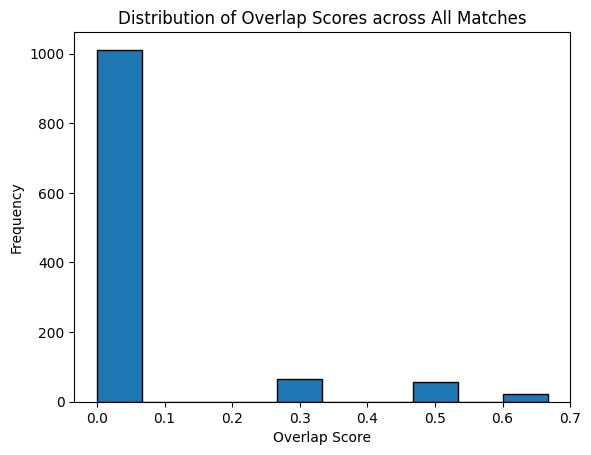

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load job descriptions and resumes files
job_descriptions_file = "/content/drive/MyDrive/FYP/Job_descriptions.xlsx"
tfidf_resumes_file = "/content/all_resumes_with_tfidf_keywords.xlsx"

# Read job descriptions with required skills
job_df = pd.read_excel(job_descriptions_file)
job_df = job_df[["Job ID", "Job Title", "Required Skills"]]

# Read resumes with top keywords (assumed to be in 'Top_Keywords' column)
resume_df = pd.read_excel(tfidf_resumes_file)
resume_df = resume_df[["Filename", "Top_Keywords"]]

# Convert Top_Keywords column to a set of lowercase keywords
resume_df["Top_Keywords"] = resume_df["Top_Keywords"].apply(
    lambda x: set(str(x).lower().split(", ")) if pd.notna(x) else set()
)

# Function to calculate keyword overlap score
def calculate_keyword_overlap(required_keywords, top_keywords):
    # Convert required keywords to a lowercase set
    required_set = set(required_keywords.lower().split(", ")) if pd.notna(required_keywords) else set()
    # Calculate intersection
    matched_keywords = required_set.intersection(top_keywords)
    # Calculate overlap score as the proportion of matched keywords
    overlap_score = len(matched_keywords) / len(required_set) if required_set else 0
    return overlap_score, matched_keywords

# Create a list to store results
results = []

# Calculate overlap for each job description and each resume
for _, job_row in job_df.iterrows():
    job_id = job_row["Job ID"]
    job_title = job_row["Job Title"]
    required_keywords = job_row["Required Skills"]

    for _, resume_row in resume_df.iterrows():
        resume_name = resume_row["Filename"]
        top_keywords = resume_row["Top_Keywords"]

        # Calculate overlap score
        overlap_score, matched_keywords = calculate_keyword_overlap(required_keywords, top_keywords)

        # Store result
        results.append({
            "Job ID": job_id,
            "Job Title": job_title,
            "Resume": resume_name,
            "Overlap Score": round(overlap_score, 3),
            "Matched Keywords": ", ".join(matched_keywords) if matched_keywords else "None"
        })

# Convert results to DataFrame and save as an Excel file
output_df = pd.DataFrame(results)
output_file = "keyword_overlap_accuracy_fixed.xlsx"
output_df.to_excel(output_file, index=False)

print(f"Keyword overlap accuracy results saved to {output_file}")

# Plot histogram of overlap scores
plt.hist(output_df["Overlap Score"], bins=10, edgecolor='black')
plt.xlabel("Overlap Score")
plt.ylabel("Frequency")
plt.title("Distribution of Overlap Scores across All Matches")
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize SBERT model for embedding and similarity checks
sbert_model = SentenceTransformer("paraphrase-MPNet-base-v2")

# Sample list of domain-specific terms to ensure retention of essential skills
domain_specific_skills = ["Python", "Java", "Machine Learning", "AWS", "DevOps", "Data Science", "NLP"]

# Function to apply two-stage TF-IDF
def extract_keywords(df):
    # First stage: Apply TF-IDF to each individual resume
    resume_texts = df['Preprocessed_Content'].tolist()
    individual_tfidf = TfidfVectorizer(max_features=50)  # Limited feature set per resume
    tfidf_matrix_individual = individual_tfidf.fit_transform(resume_texts)
    feature_names_individual = individual_tfidf.get_feature_names_out()

    # Collect keywords per resume
    individual_keywords = []
    for row in tfidf_matrix_individual:
        sorted_indices = np.argsort(row.toarray()).flatten()[::-1]
        top_keywords = [feature_names_individual[i] for i in sorted_indices if feature_names_individual[i] in domain_specific_skills or row.toarray().flatten()[i] > 0.1]
        individual_keywords.append(top_keywords)

    df['Individual_Top_Keywords'] = individual_keywords

    # Second stage: Apply TF-IDF across all resumes
    combined_tfidf = TfidfVectorizer(max_features=100)
    tfidf_matrix_combined = combined_tfidf.fit_transform(df['Preprocessed_Content'].fillna(""))
    feature_names_combined = combined_tfidf.get_feature_names_out()

    # Collect top combined keywords across all resumes and prioritize domain-specific terms
    combined_keywords = []
    for row in tfidf_matrix_combined:
        sorted_indices = np.argsort(row.toarray()).flatten()[::-1]
        top_keywords = [feature_names_combined[i] for i in sorted_indices if feature_names_combined[i] in domain_specific_skills or row.toarray().flatten()[i] > 0.05]
        combined_keywords.append(top_keywords)

    df['Combined_Top_Keywords'] = combined_keywords
    print("Two-stage TF-IDF keyword extraction complete.")

    # Return the DataFrame with both keyword sets
    return df

# Function to refine keywords by semantic similarity to job description
def refine_keywords(df, job_description):
    # Generate embedding for the job description
    job_embedding = sbert_model.encode(job_description, convert_to_tensor=True)

    refined_keywords = []
    for keywords in df['Combined_Top_Keywords']:
        # Check if the keyword list is empty before processing
        if keywords:
            keyword_embeddings = sbert_model.encode(keywords, convert_to_tensor=True)
            # Calculate similarity score
            similarity_scores = util.cos_sim(job_embedding, keyword_embeddings).cpu().numpy().flatten()
            # Rank keywords by similarity
            ranked_keywords = [keywords[i] for i in np.argsort(similarity_scores)[::-1]]
            refined_keywords.append(ranked_keywords[:20])  # Top 20 keywords by similarity
        else:
            refined_keywords.append([])  # If no keywords are found, append an empty list

    df['Refined_Top_Keywords'] = refined_keywords
    print("Keyword refinement based on semantic similarity to job description complete.")
    return df

# Main function to handle processing and keyword extraction for resumes from Excel file
def process_resumes_from_excel(excel_file_path, job_description_file_path):
    # Load job description from txt file
    with open(job_description_file_path, 'r') as file:
        job_description = file.read().strip()

    # Read the resumes from the Excel file
    df = pd.read_excel(excel_file_path)

    # Ensure the required columns are present
    if not all(col in df.columns for col in ['Filename', 'Preprocessed_Content']):
        raise ValueError("Excel file must contain 'Filename' and 'Preprocessed_Content' columns.")

    # Handle NaN values in 'Preprocessed_Content' column
    df['Preprocessed_Content'] = df['Preprocessed_Content'].fillna("")

    # Apply two-stage TF-IDF and refine by job description
    df = extract_keywords(df)
    df = refine_keywords(df, job_description)

    # Save the keywords to an Excel file
    df.to_excel('resume_keywords.xlsx', index=False)
    print("Keywords saved to resume_keywords.xlsx")

    # Display final DataFrame with refined keywords
    print(df[['Filename', 'Individual_Top_Keywords', 'Combined_Top_Keywords', 'Refined_Top_Keywords']])

# Example usage
excel_file_path = r"/content/all_resumes_combined_preprocessed.xlsx"  # Path to your Excel file containing preprocessed resumes
job_description_file_path = r"/content/job_description.txt"  # Path to the job description text file
process_resumes_from_excel(excel_file_path, job_description_file_path)


Two-stage TF-IDF keyword extraction complete.
Keyword refinement based on semantic similarity to job description complete.
Keywords saved to resume_keywords.xlsx
                                             Filename  \
0   A-Roshan Account Manager Oct 2024-1 - Roshan K...   
1         AQ_Resume - K214602 Ammar Safdar Quadri.pdf   
2       Aizaz's resume(new) - k224012 Aizaz Usman.pdf   
3        Aqib Shah (Python Developer) - Aqib Shah.pdf   
4   AshadAbdullah Resume - K213296 Ashad Abdullah ...   
..                                                ...   
73                                  candidate_132.pdf   
74                                  candidate_135.pdf   
75                                  candidate_139.pdf   
76                                  candidate_141.pdf   
77                                  candidate_146.pdf   

                              Individual_Top_Keywords  \
0   [business, team, marketing, management, 2024, ...   
1   [management, css, html, language, s